In [1]:
import numpy as np
# import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
# from branchingv2 import *
import sys
from sklearn.model_selection import ParameterGrid
import gzip
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
%run ../codes/branching_rv1.py

In [5]:
WN = np.loadtxt('../data/W_avg.csv')
pop = np.loadtxt('../data/pop_new.csv')

In [31]:
# daily_per_pop = NewInf[:,:]/pop[:,None]*100000
# num_county = np.sum(daily_per_pop[:,:]>10,axis=0)
T = 60
# daily_per_pop1 = NewInf[:,:]/pop[:,None]*100000
# num_county1 = np.sum(daily_per_pop1[:,:]>10,axis=0)
plt.plot(np.arange(T), num_county, label='r = 0.1')
plt.plot(np.arange(T), num_county1, label='r = 0.025')
plt.legend()

NameError: name 'num_county1' is not defined

In [8]:
z_num = 200000
latency_p = SSA.gamma.rvs(a=Z, scale=Zb, size=z_num)
infectious_p = SSA.gamma.rvs(a=D, scale=Db, size=z_num)
v = np.random.random(z_num)
delay_days = latency_p+v*infectious_p  # 3+5*0.5
lam_inverse = np.mean(delay_days)
delay_days_exp = SSA.expon.rvs(scale=lam_inverse, size=z_num) 
## scale = 1/lamda is the mean of the distribution
len(delay_days_exp)


200000

In [9]:
np.mean(delay_days), np.mean(delay_days_exp)

(5.4954616686461835, 5.5162924382335845)

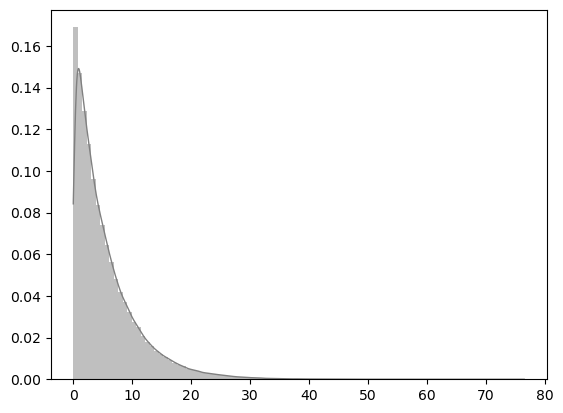

In [10]:
plt.hist(delay_days_exp,bins=100,density=True,alpha=0.5, color='gray')
kde = gaussian_kde(delay_days_exp)
x_grid = np.linspace(min(delay_days_exp), max(delay_days_exp), 1000)
plt.plot(x_grid, kde.evaluate(x_grid), color='gray',lw=1)

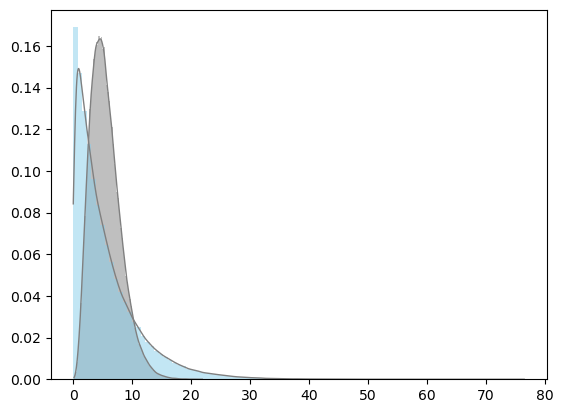

In [11]:
plt.hist(delay_days,bins=100,density=True,alpha=0.5, color='gray')
kde = gaussian_kde(delay_days)
x_grid = np.linspace(min(delay_days), max(delay_days), 1000)
plt.plot(x_grid, kde.evaluate(x_grid), color='gray',lw=1)

plt.hist(delay_days_exp,bins=100,density=True,alpha=0.5, color='skyblue')
kde = gaussian_kde(delay_days_exp)
x_grid = np.linspace(min(delay_days_exp), max(delay_days_exp), 1000)
plt.plot(x_grid, kde.evaluate(x_grid), color='gray',lw=1)

In [8]:
num_fips = len(pop)
T = 60
#initialize variables
# seeding
l0 = 1859-1
rs = np.array([20, 10, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.025])

In [7]:
import numpy as np
import gzip

def load_gzipped_numpy(filename):
    try:
        with gzip.open(filename, 'rb') as f:
            return np.load(f, allow_pickle=True)
    except FileNotFoundError:
        return [0]

In [32]:
R0 = 2.5
# rs = np.array([2.0, 0.025])
# rs = np.array([0.1])
# export_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff_exp/'
export_dir = '/Volumes/Seagate_Qing/branching_data/simulation/python_no_cutoff_exp/'
E_mean_county = np.zeros((9,60))
E_std_county = np.zeros((9,60))
M_En_NewInf = np.zeros((9,300,num_fips,T))
for r_idx in range(9):
    r = rs[r_idx]
    print(r)
    sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(r,3))
    En_NewInf = np.zeros((300,num_fips,T))
    for i in range(300):
        export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(r,3),(i+1))
        temp = load_gzipped_numpy(export_names)
        if len(temp) == 1:
            print(r, i)
        else:
            En_NewInf[i,:,:] = temp
            M_En_NewInf[r_idx,i,:,:] = temp
    ### select the ensembles in which the dieases does not die out
    E_daily_per_pop = En_NewInf[:,:,:]/pop[None,:,None]*100000
    num_county = np.sum(E_daily_per_pop[:,:,:]>10,axis=1)
    E_mean_county[r_idx] = np.mean(num_county,axis=0)
    E_std_county[r_idx] = np.std(num_county,axis=0)

20.0
10.0
2.0
1.0
0.5
0.2
0.1
0.05
0.025


In [36]:
# NewInf_ode = np.loadtxt('../data/metapop_R025.csv')
# infec_perpop = NewInf_ode/pop[:,None]*100000
# county_ode = np.sum(infec_perpop>10,axis=0)

In [37]:
colors = {0:'orange',3:'yellowgreen',6:'lightskyblue',8:'cornflowerblue'}

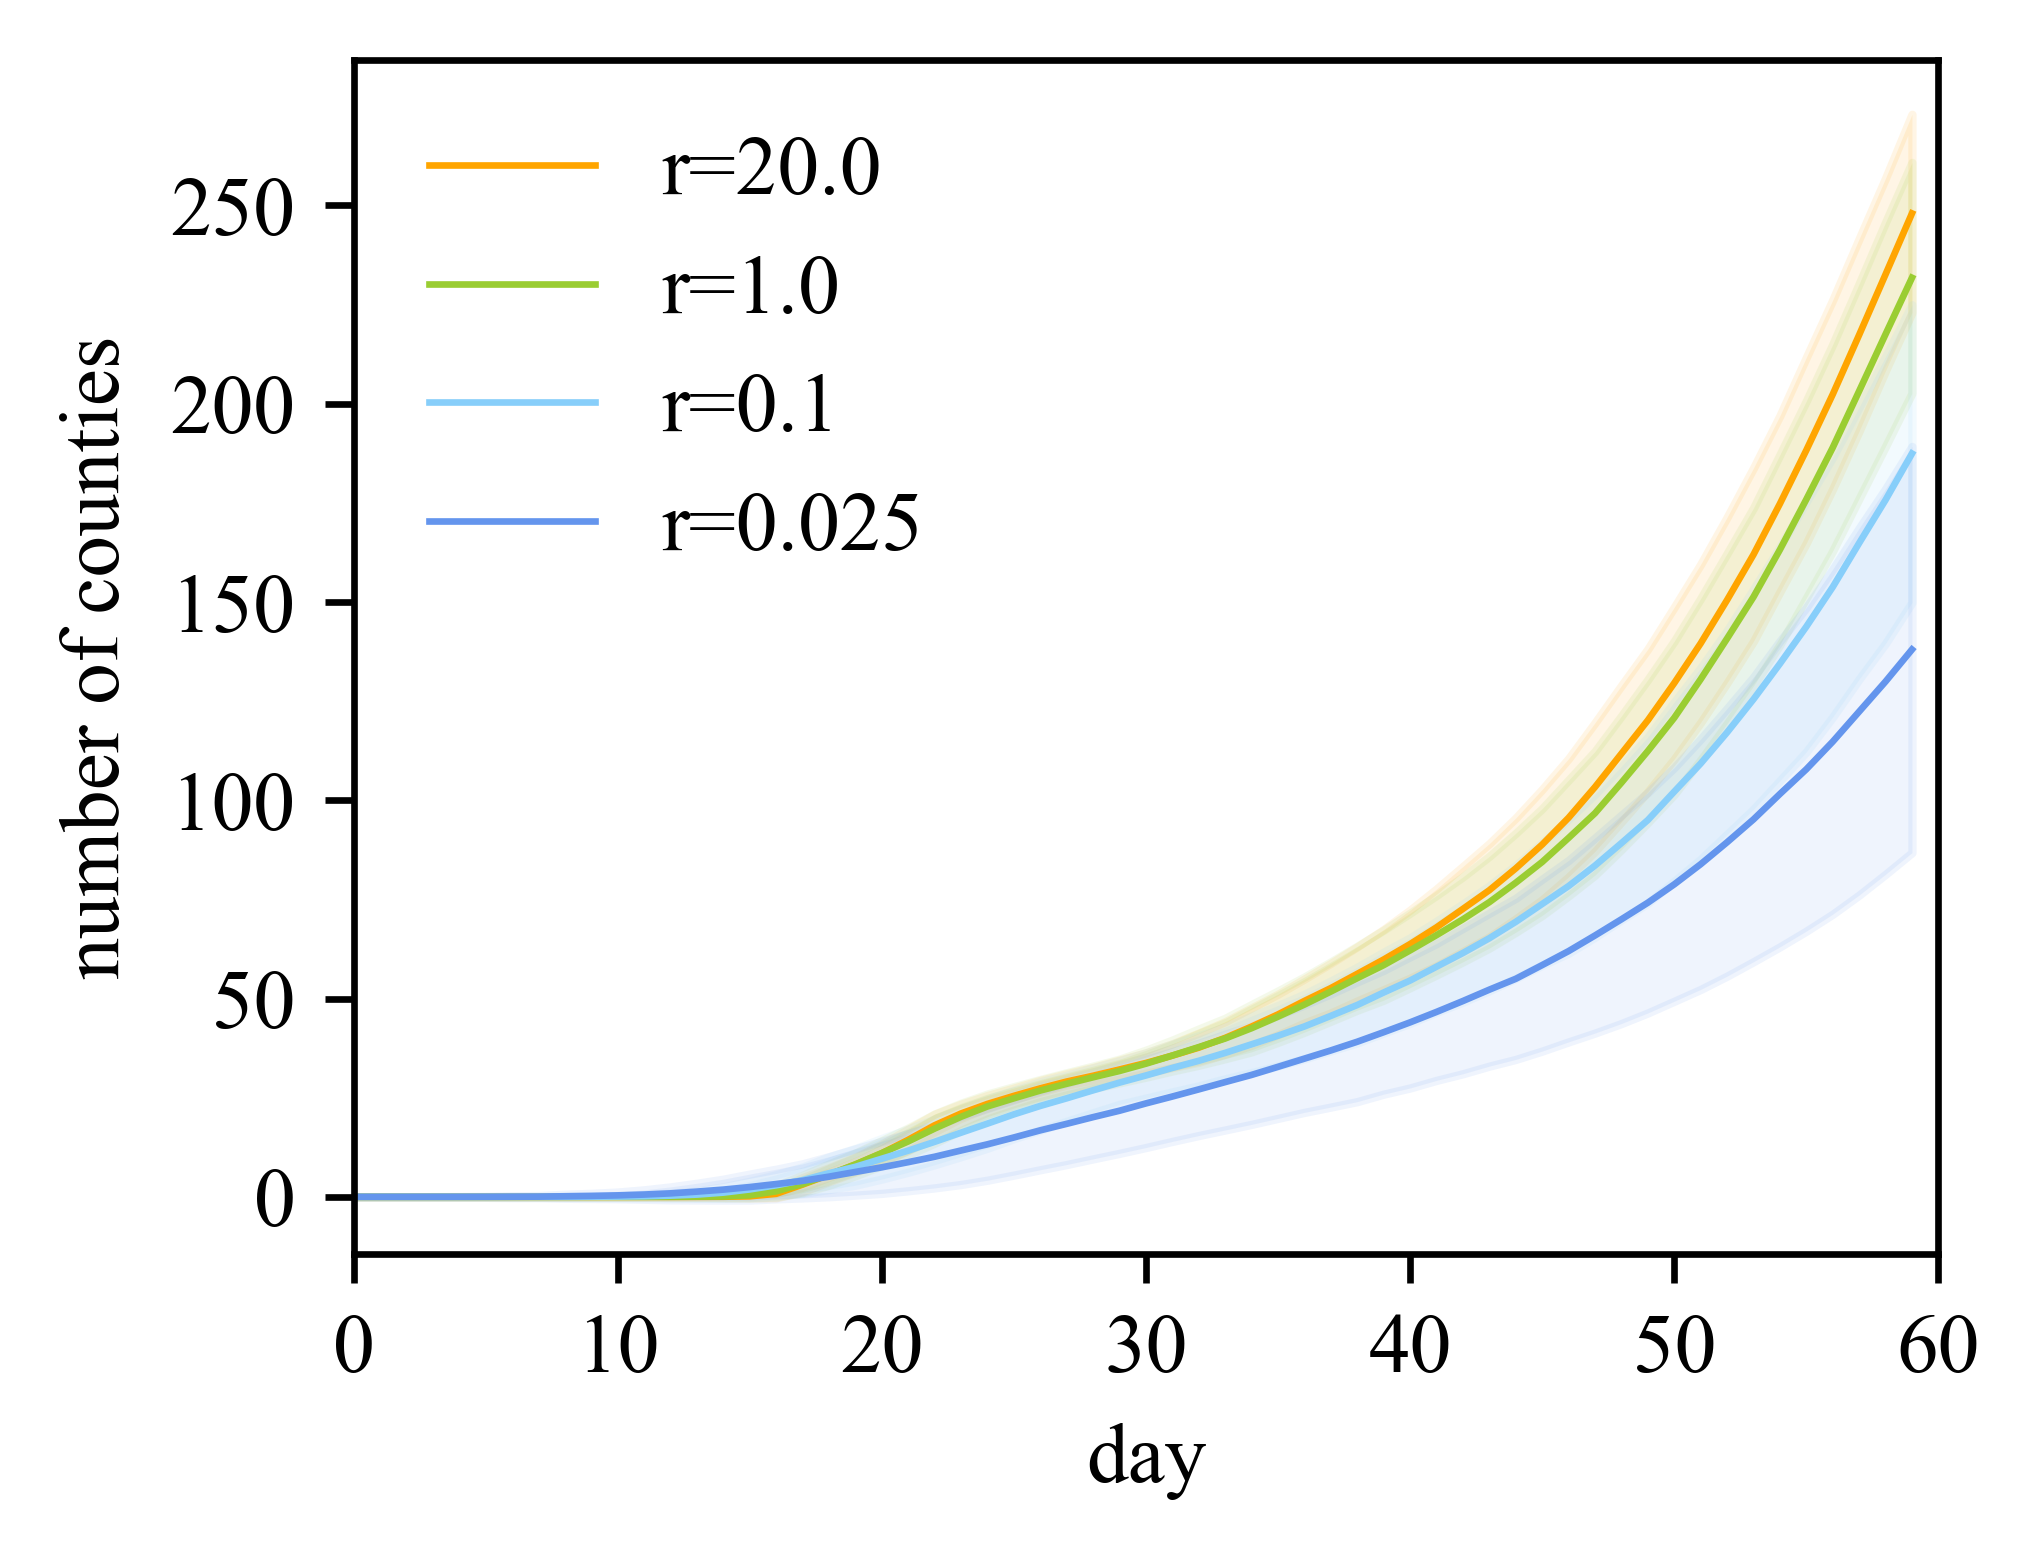

In [38]:
plt.rcParams['font.family'] = 'Times New Roman' 
plt.figure(dpi=600,figsize=(3.5,2.7))
for r_idx in [0,3,6,8]:
    r = rs[r_idx]
    mean_county1 =  E_mean_county[r_idx]
    std_county1 = E_std_county[r_idx]
    
    plt.fill_between(range(60),mean_county1-std_county1,mean_county1 +std_county1,alpha=0.1,color=colors[r_idx])
    plt.plot(mean_county1,label='r={}'.format(r),color=colors[r_idx],lw=0.8)


# plt.plot(county_ode_avg,label='metapopulation',color='red',lw=0.8)
# plt.fill_between(range(60),county_ode_avg-county_ode_std, county_ode_avg + county_ode_std, alpha=0.1,color='red')

# plt.plot(mean_county,label='r=0.025matlab')
# plt.fill_between(range(60),mean_county-std_county,mean_county +std_county,alpha=0.1)
# plt.plot(mean_county2,label='r=02matlab')
# plt.fill_between(range(60),mean_county2-std_county2,mean_county2 +std_county2,alpha=0.1)
# plt.plot(mean_county3,label='r=01matlab')
# plt.fill_between(range(60),mean_county3-std_county3,mean_county3 +std_county3,alpha=0.1)

plt.legend(frameon=False)
plt.xlabel('day',size=10)
plt.ylabel('number of counties',size=10)
plt.xlim(0,60)
plt.tight_layout()

# plt.ylim(-1,40)
# plt.savefig('odevsbranching.pdf',bbox_inches='tight')
# plt.savefig('odevsbranching.eps',bbox_inches='tight',format='eps')